<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#**นำข้อมูลเข้า**

In [6]:
data = pd.read_csv('/content/Pizza.csv')

In [4]:
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#**plot scatter ของ data ทั้งหมด**

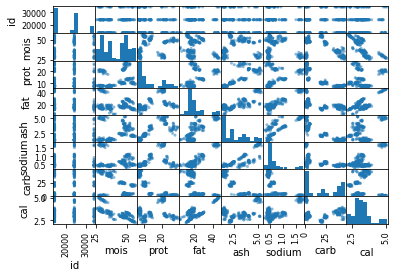

In [7]:
pd.plotting.scatter_matrix(data);

In [53]:
new_data=data.iloc[:,2:]   ## เลือกเอาตัวเลขมาใช้จึงตัด column  ที่ไม่ใช่ออก
new_data

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#**plot scatter ของ data ที่ตัด column ที่ไม่ได้ใช้**

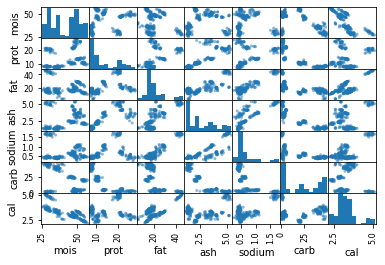

In [54]:
pd.plotting.scatter_matrix(new_data);

In [55]:
corr = np.corrcoef(new_data.to_numpy().T)


In [56]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [57]:
corr.shape

(7, 7)

In [58]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

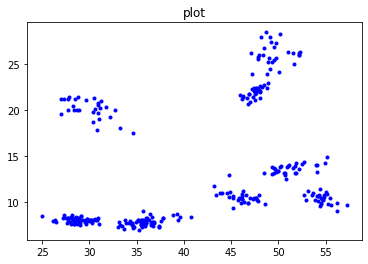

In [59]:
plt.plot(new_data.iloc[:,0],new_data.iloc[:,1],'b.');
plt.title('plot');

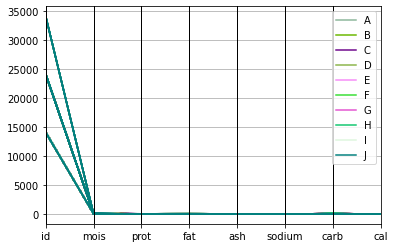

In [60]:
pd.plotting.parallel_coordinates(data,'brand') 

In [61]:
pca = PCA(n_components=2)

In [62]:
new_pca = pca.fit_transform(new_data.to_numpy())

In [63]:
new_pca.shape

(300, 2)

In [64]:
BD= set(data['brand'])
BD

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [65]:
BD_l = list(BD)  ## แปลงเป็น list
BD_l.sort()  ### เรียงจากน้อยไปมาก
color_list2 = {}     ### คำสั่งวนลูปเพื่อเปลี่ยนข้อมูลเป็นตัวเลข
num = 0
for each_fg in BD_l:
     if each_fg not in color_list2:
       color_list2[each_fg] = num
       num += 1 

In [66]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [67]:
data_dropped = data.replace(color_list2)

In [68]:
data_dropped

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


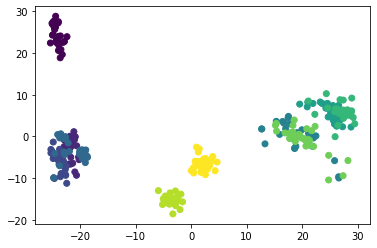

In [69]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'])

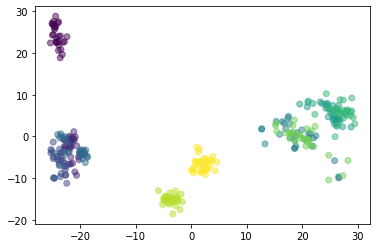

In [70]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5)

In [71]:
bb = data_dropped[(data_dropped['brand']==0) | (data_dropped['brand']==9)]
bb

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [72]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

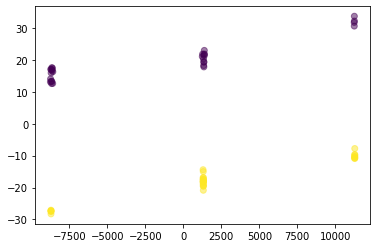

In [73]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['brand'],alpha=0.5)

In [74]:
baby_pca = pca.transform(bb[bb['brand']==0].iloc[:,1:].to_numpy())
fast_pca = pca.transform(bb[bb['brand']==9].iloc[:,1:].to_numpy())

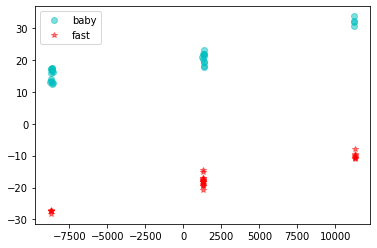

In [75]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()